In [1]:
import csv
import pandas as pd
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline

## Introduction

United States has been a country that a lot of people would like to develop their career in. There are a lot of great job opportunities in United States. Particularly for students like us, attending the computer science bootcamp, we are also finding an opportunity for career transition. However, do we really know what are we looking for? What is the dream job that gets highly paid and has the higher rate of employment? Is the Computer Science really a dream job for everyone? 

To figure out the questions, I analyzed the data  from the Occupational Employment Statistics (OES) program offered by Bureau Labor of Statistics[1]. The following will take a preliminary look at the provided data including the meaning of each feature, the basics of how the data was collected, as well as the collecting methodologies.

[1]: The data is retrieved from a program conducted by Bureau Labor of Statistics. The Occupational Employment Statistics (OES) program conducts a semiannual mail survey designed to produce estimates of employment and wages for specific occupations. The OES program collects data on wage and salary workers in nonfarm establishments in order to produce employment and wage estimates for about 800 occupations.  Surveys collect data for the payroll period including the 12th day of May or November. Data from self-employed persons are not collected and are not included in the estimates.

Reference: Bureau Labor of Statistics, https://www.bls.gov/oes/oes_emp.htm#overview

In [2]:
jobs = pd.read_csv('occupations.csv')
jobs.head()

,PRIM_STATE,AREA,AREA_NAME,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC QUOTIENT,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
0,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",00-0000,All Occupations,total,"5,783,690",0.4,1000.000,1.00,...,19.08,32.89,52.04,"21,190","25,180","39,680","68,420","108,250",NaN,NaN
1,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",11-0000,Management Occupations,major,"330,970",1.1,57.225,1.13,...,53.29,77.60,#,"48,320","72,550","110,850","161,410",#,NaN,NaN
2,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",11-1011,Chief Executives,detailed,"11,400",4.9,1.971,1.24,...,#,#,#,"96,150","151,770",#,#,#,NaN,NaN
3,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",11-1021,General and Operations Managers,detailed,"99,260",1.5,17.163,1.10,...,55.15,86.76,#,"49,290","73,820","114,720","180,470",#,NaN,NaN
4,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",11-1031,Legislators,detailed,690,6.9,0.119,0.31,...,*,*,*,"42,920","52,880","63,270","90,380","111,850",True,NaN


Currently, all missing values are recorded as a star (*). Also, the number are presented as strings, and some of them have a comma within numbers. As a result, I will convert them to float and use NaN to replace unknown data. Because I'll use the data of annual average income (A_MEAN) and hourly average income (H_MEAN) to do some calculation, I'll delete the rows without the two data.  

Data source: https://www.bls.gov/oes/current/oes_nat.htm

# Analytic Questions
**#1 Do the field in Computer and Math earn most money in metropolitan area in U.S.?**

The Computer and Mathematical field is a group of a lot of occupations (marked as major in the column of OCC_GROUP). The subgroup of the field is also included in the data. So I'll have to filter the detail items in the field. (marked as detail in the column as OCC_GROUP)  

In [3]:
#transfer the H_MEAN or A_MEAN or JOBS_1000 number from string to float
jobs['A_MEAN'] = jobs['A_MEAN'].str.replace(',', '')
jobs['TOT_EMP'] = jobs['TOT_EMP'].str.replace(',', '')
jobs['A_MEAN'] = pd.to_numeric(jobs.A_MEAN, errors='coerce')
jobs['H_MEAN'] = pd.to_numeric(jobs.H_MEAN, errors='coerce')
jobs['TOT_EMP'] = pd.to_numeric(jobs.TOT_EMP, errors='coerce')

#drop the word'Occupations' in each row of OCC_TITLE
jobs['OCC_TITLE'] = jobs['OCC_TITLE'].str.replace('Occupations', '')

#delete the rows without value
jobe=jobs[jobs['OCC_GROUP'].notnull()]
job=jobs[jobs['H_MEAN'].notnull() & jobs['A_MEAN'].notnull()]
#filter the data without'major'
major = job[job['OCC_GROUP'].str.contains('major')]
majore = jobe[jobe['OCC_GROUP'].str.contains('major')]
major.head()

,PRIM_STATE,AREA,AREA_NAME,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC QUOTIENT,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
1,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",11-0000,Management,major,330970.0,1.1,57.225,1.13,...,53.29,77.60,#,"48,320","72,550","110,850","161,410",#,NaN,NaN
34,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",13-0000,Business and Financial Operations,major,352020.0,1.3,60.864,1.17,...,34.59,46.82,61.48,"38,840","52,850","71,950","97,380","127,870",NaN,NaN
66,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",15-0000,Computer and Mathematical,major,161410.0,2.6,27.908,0.94,...,42.65,57.34,71.71,"43,460","61,660","88,710","119,270","149,160",NaN,NaN
85,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",17-0000,Architecture and Engineering,major,100720.0,2.5,17.414,0.98,...,43.20,58.19,74.02,"49,820","66,190","89,850","121,040","153,960",NaN,NaN
120,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",19-0000,"Life, Physical, and Social Science",major,47570.0,6.1,8.225,1.00,...,33.62,47.08,59.46,"34,950","47,500","69,930","97,930","123,680",NaN,NaN


As the data had filtered out detail items in each field of occupation, the same occupations in different area of the States should be combined. As a result, in the database of 'major', the same fields were group together, and the data of annual average income and hourly average income in different area were averaged again.[2]

[2]: Actually the value in H_MEAN and A_MEAN shouldn't be simply averaged when grouped together. The method of weighted average should be applied because the number in each field was different. However, to make it a simple way, in this case the average was used. 

In [4]:
#caulculate the average of income per hour/year of occupations in U.S. major states
H_MEAN_all = major.groupby(['OCC_TITLE'])[['H_MEAN']].mean()
print(H_MEAN_all)
A_MEAN_all = major.groupby(['OCC_TITLE'])[['A_MEAN']].mean()
print(A_MEAN_all)

                                                    H_MEAN
OCC_TITLE                                                 
Architecture and Engineering                     43.160000
Arts, Design, Entertainment, Sports, and Media   31.148182
Building and Grounds Cleaning and Maintenance    14.767273
Business and Financial Operations                39.732727
Community and Social Service                     24.668182
Computer and Mathematical                        45.338182
Construction and Extraction                      27.202727
Education, Training, and Library                 28.680000
Farming, Fishing, and Forestry                   14.863636
Food Preparation and Serving Related             12.608182
Healthcare Practitioners and Technical           42.223636
Healthcare Support                               15.958182
Installation, Maintenance, and Repair            24.651818
Legal                                            57.131818
Life, Physical, and Social Science               37.7518

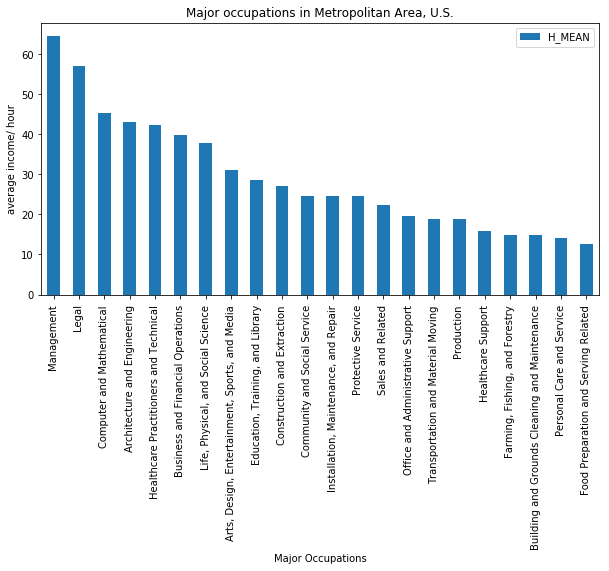

In [5]:
# sort the income in descending order, and use a bar chart
H_MEAN_all.sort_values("H_MEAN",ascending=False).plot(kind='bar', figsize=(10,5))
plt.ylabel('average income/ hour')
plt.xlabel('Major Occupations')
plt.title('Major occupations in Metropolitan Area, U.S.')

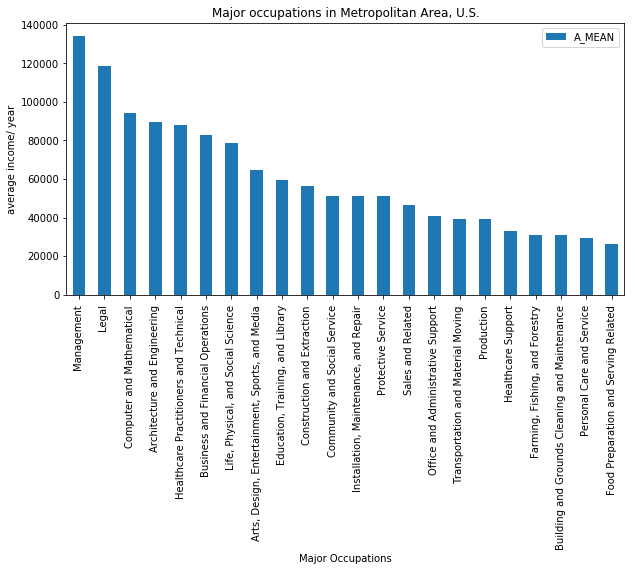

In [6]:
# sort the income in descending order, and use a bar chart
A_MEAN_all.sort_values("A_MEAN",ascending=False).plot(kind='bar',figsize=(10,5))
plt.ylabel('average income/ year')
plt.xlabel('Major Occupations')
plt.title('Major occupations in Metropolitan Area, U.S.')

In order to see whether the field in Computer and Mathematical earns most money in U.S. metropolitan Area, the data was presented with a bar chart and from highest to lowest. It shows that the field is the number three highest both for the average income/ year and average income/ hour. Also, the trend in each career is the same in average income/ year and hourly income/year. Management and Legal are the number one and two.

To know whether the trend is applicable in San Francisco, a place famous for the field of Computer and Math, the area was narrowed down to the San Francisco.

In [20]:
#filter the data without'San Francisco, CA'
majore_sub = major[major['AREA_NAME'].str.contains('San Francisco-Oakland-Hayward, CA')]
majore_sub.head()

,PRIM_STATE,AREA,AREA_NAME,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC QUOTIENT,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
779,CA,41860,"San Francisco-Oakland-Hayward, CA",11-0000,Management,major,162760.0,1.3,71.917,1.42,...,64.42,91.66,#,"58,940","88,430","134,000","190,650",#,NaN,NaN
814,CA,41860,"San Francisco-Oakland-Hayward, CA",13-0000,Business and Financial Operations,major,177570.0,1.4,78.465,1.51,...,40.62,55.38,75.67,"48,850","62,970","84,480","115,190","157,390",NaN,NaN
845,CA,41860,"San Francisco-Oakland-Hayward, CA",15-0000,Computer and Mathematical,major,135380.0,2.2,59.822,2.02,...,53.52,67.93,79.43,"59,200","82,140","111,330","141,290","165,200",NaN,NaN
863,CA,41860,"San Francisco-Oakland-Hayward, CA",17-0000,Architecture and Engineering,major,52030.0,3.5,22.992,1.29,...,46.19,60.44,75.59,"53,780","70,010","96,080","125,700","157,230",NaN,NaN
896,CA,41860,"San Francisco-Oakland-Hayward, CA",19-0000,"Life, Physical, and Social Science",major,41040.0,2.6,18.134,2.21,...,41.09,57.03,73.62,"43,300","58,730","85,470","118,630","153,140",NaN,NaN


In [21]:
#caulculate the average of income per hour/year of occupations in C.A.
H_MEAN_sub = majore_sub.groupby(['OCC_TITLE'])[['H_MEAN']].mean()
print(H_MEAN_sub)
A_MEAN_sub = major_sub.groupby(['OCC_TITLE'])[['A_MEAN']].mean()
print(A_MEAN_sub)

                                                 H_MEAN
OCC_TITLE                                              
Architecture and Engineering                      48.45
Arts, Design, Entertainment, Sports, and Media    34.38
Building and Grounds Cleaning and Maintenance     17.48
Business and Financial Operations                 46.32
Community and Social Service                      27.44
Computer and Mathematical                         54.04
Construction and Extraction                       32.37
Education, Training, and Library                  30.95
Farming, Fishing, and Forestry                    16.09
Food Preparation and Serving Related              14.76
Healthcare Practitioners and Technical            51.75
Healthcare Support                                19.81
Installation, Maintenance, and Repair             28.16
Legal                                             69.41
Life, Physical, and Social Science                44.95
Management                                      

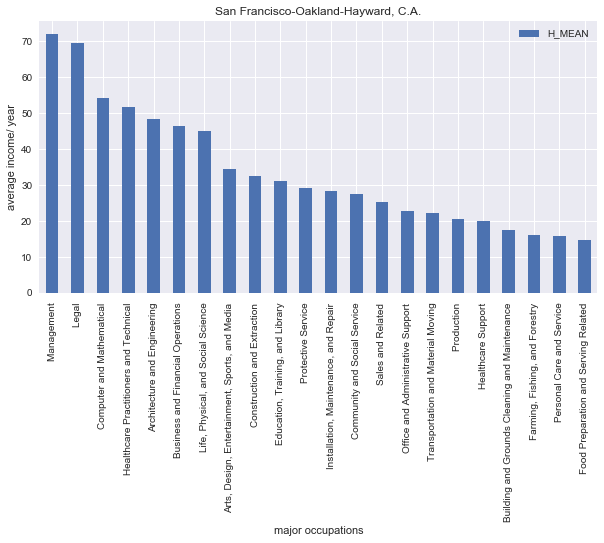

In [22]:
# sort the income in descending order, and use a bar chart
H_MEAN_sub.sort_values("H_MEAN",ascending=False).plot(kind='bar',figsize=(10,5))
plt.ylabel('average income/ year')
plt.xlabel('major occupations')
plt.title('San Francisco-Oakland-Hayward, C.A.')

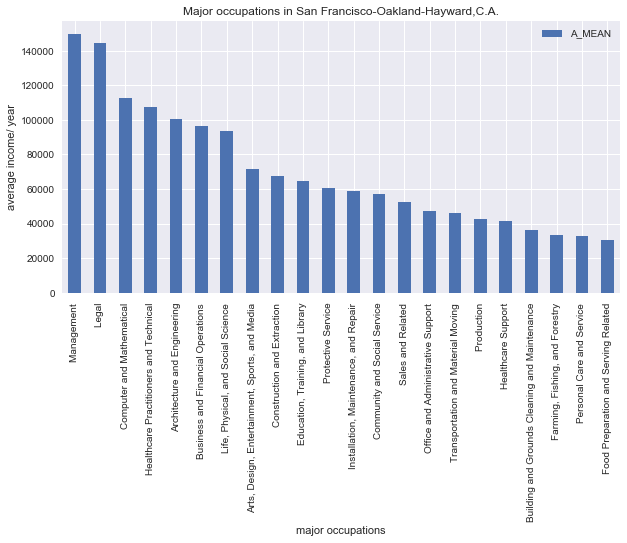

In [23]:
# sort the income in descending order, and use a bar chart
A_MEAN_sub.sort_values("A_MEAN",ascending=False).plot(kind='bar',figsize=(10,5))
plt.ylabel('average income/ year')
plt.xlabel('major occupations')
plt.title('Major occupations in San Francisco-Oakland-Hayward,C.A.')

Further analysis was done to see whether the field has the same ranking in San Francisco since I live in San Francisco and the place is well-known for the career. The result showed that the field of Computer and Mathemetics had the same ranking as in the metropolitan area in U.S. even though the hourly average income is 54.04 in SF, and the income is 45.34 among U.S., and the annual average income in SF is 112,410, and 94,302 among U.S.

**#2 Does employment rate distribute evenly among the careers?**

On top of knowing the salary of each major occupation in U.S. metropolitan areas, employment rate is also a significant index for people who want to do transition for their career. Whether the employment rate distribute evenly among the careers is a good reference for people to evaluate the talent demands is large or not in a certain occupation. To get the data of employment rate, I turned the number of employment people from string to float. Also, since the same occupation in different area will be grouped together, the employment rate provided cannot be used.

In [11]:
#delete the rows without value
job_TOTEMP=jobs[jobs['TOT_EMP'].notnull()]

#filter the data without'major'
major_TOTEMP = job_TOTEMP[job_TOTEMP['OCC_GROUP'].str.contains('major')]
major_TOTEMP.head()



,PRIM_STATE,AREA,AREA_NAME,OCC_CODE,OCC_TITLE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC QUOTIENT,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
1,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",11-0000,Management,major,330970.0,1.1,57.225,1.13,...,53.29,77.60,#,"48,320","72,550","110,850","161,410",#,NaN,NaN
34,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",13-0000,Business and Financial Operations,major,352020.0,1.3,60.864,1.17,...,34.59,46.82,61.48,"38,840","52,850","71,950","97,380","127,870",NaN,NaN
66,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",15-0000,Computer and Mathematical,major,161410.0,2.6,27.908,0.94,...,42.65,57.34,71.71,"43,460","61,660","88,710","119,270","149,160",NaN,NaN
85,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",17-0000,Architecture and Engineering,major,100720.0,2.5,17.414,0.98,...,43.20,58.19,74.02,"49,820","66,190","89,850","121,040","153,960",NaN,NaN
120,CA,31080,"Los Angeles-Long Beach-Anaheim, CA",19-0000,"Life, Physical, and Social Science",major,47570.0,6.1,8.225,1.00,...,33.62,47.08,59.46,"34,950","47,500","69,930","97,930","123,680",NaN,NaN


After grouping different areas, I also turned the number of emplyment people into percentage for furthure use.

In [12]:
#caulculate the average of income per hour/year of occupations in U.S. major states
sum_TOTEMP = major_TOTEMP.groupby(['OCC_TITLE'])[['TOT_EMP']].sum()

#create a column for the percentage of TOT_EMP
EMP_PERCENTAGE = sum_TOTEMP['TOT_EMP']*100/ sum_TOTEMP['TOT_EMP'].sum()

print(sum_TOTEMP.head())
print(EMP_PERCENTAGE.head())

                                                   TOT_EMP
OCC_TITLE                                                 
Architecture and Engineering                      663360.0
Arts, Design, Entertainment, Sports, and Media    770650.0
Building and Grounds Cleaning and Maintenance    1226000.0
Business and Financial Operations                2574460.0
Community and Social Service                      578040.0
OCC_TITLE
Architecture and Engineering                       1.660589
Arts, Design, Entertainment, Sports, and Media     1.929168
Building and Grounds Cleaning and Maintenance      3.069046
Business and Financial Operations                  6.444646
Community and Social Service                       1.447008
Name: TOT_EMP, dtype: float64


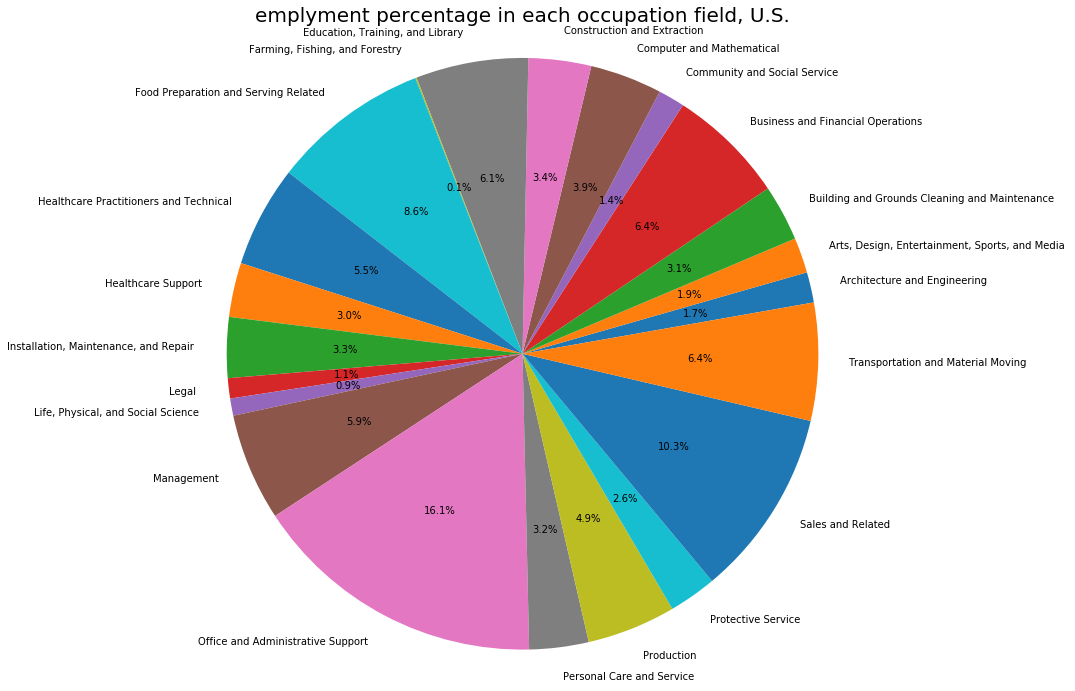

In [13]:
# Create a pie chart
# set the pie size
plt.figure(figsize=(30,12))
#Plot Video Game Sales in 1989 by Genre
plt.subplot(121)
#use the sum_TOTEMP data
plt.pie(sum_TOTEMP,
# with the labels being officer names
    labels=sum_TOTEMP.index,
    shadow=False,
# with the start angle at 10%
    startangle=10,
# with the percent listed as a fraction
    autopct='%1.1f%%')
# View the plot drop above
plt.axis('equal')
plt.title('emplyment percentage in each occupation field, U.S.',fontsize=20)
plt.show()

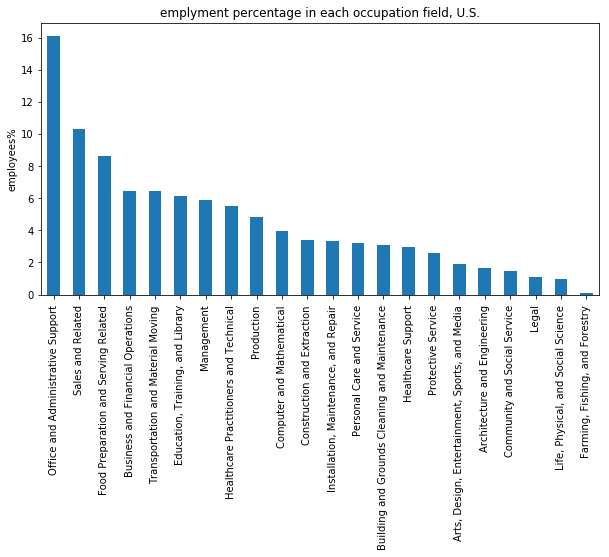

In [14]:
# use a bar chart
EMP_PERCENTAGE.sort_values(ascending=False).plot(kind='bar',figsize=(10,5))
plt.ylabel('employees%')
plt.xlabel('')
plt.title('emplyment percentage in each occupation field, U.S.')

The result showed that each job didn't distribute evenly. In fact, the Office and Administrative Support field has the highest emplyment rate, 16.1%, with the field of Farming, Fishing and Forestry the lowest, 0.1%. What's interesting is the field of Computer and Math ranks No.10 in the emplyment rate, but the salary of the career ranks number three. It seems the career has good salary but the emplyment rate is not high enough among all occupations in U.S. If we take a close look at the field of management, both the salary (ranks No.1) and emplyment rate (ranks No.7) have an exciteing data on salary and employment rate. However, as the field of management includes a huge variety of jobs, and managers are in a rather high position of each occupation, it is not that surprising.

                                                  TOT_EMP
OCC_TITLE                                                
Architecture and Engineering                      52030.0
Arts, Design, Entertainment, Sports, and Media    46950.0
Building and Grounds Cleaning and Maintenance     72980.0
Business and Financial Operations                177570.0
Community and Social Service                      32290.0
OCC_TITLE
Architecture and Engineering                       2.299059
Arts, Design, Entertainment, Sports, and Media     2.074588
Building and Grounds Cleaning and Maintenance      3.224780
Business and Financial Operations                  7.846317
Community and Social Service                       1.426804
Name: TOT_EMP, dtype: float64


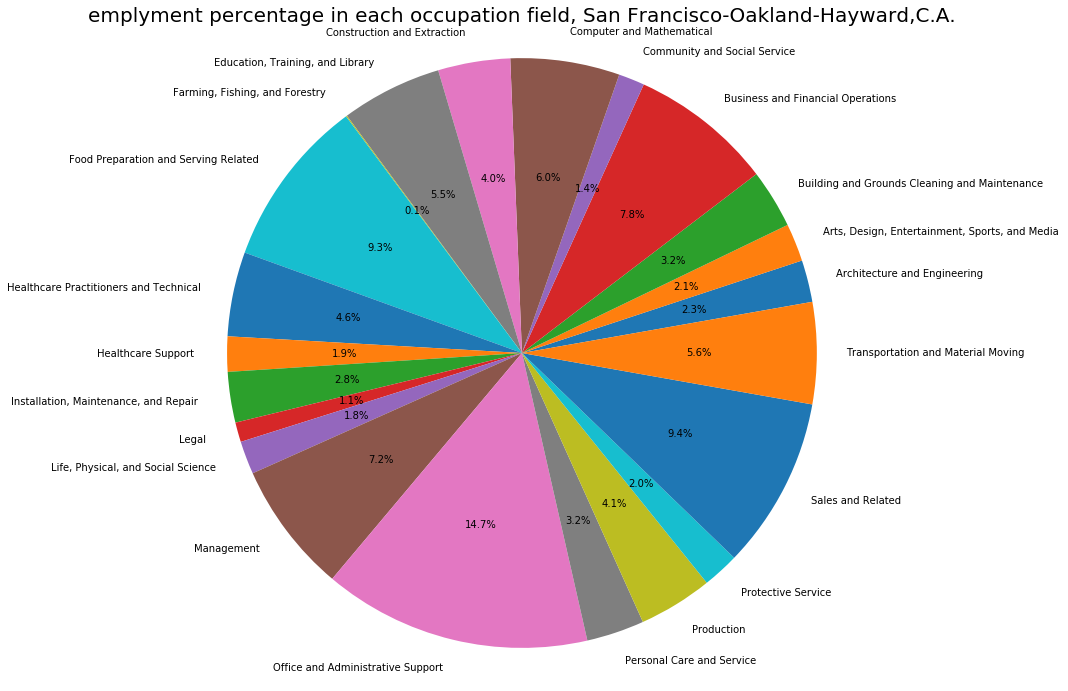

In [15]:
#filter the data without'San Francisco, CA'
majore_sub = majore[majore['AREA_NAME'].str.contains('San Francisco-Oakland-Hayward, CA')]

#caulculate the average of income per hour/year of occupations in U.S. major states
e_TOTEMP = majore_sub.groupby(['OCC_TITLE'])[['TOT_EMP']].sum()

#create a column for the percentage of TOT_EMP
sEMP_PERCENTAGE = e_TOTEMP['TOT_EMP']*100/ e_TOTEMP['TOT_EMP'].sum()

print(e_TOTEMP.head())
print(sEMP_PERCENTAGE.head())
# Create a pie chart
# set the pie size
plt.figure(figsize=(30,12))
#Plot Video Game Sales in 1989 by Genre
plt.subplot(121)
#use the sum_TOTEMP data
plt.pie(e_TOTEMP,
# with the labels being officer names
    labels=e_TOTEMP.index,
    shadow=False,
# with the start angle at 10%
    startangle=10,
# with the percent listed as a fraction
    autopct='%1.1f%%')
# View the plot drop above
plt.axis('equal')
plt.title('emplyment percentage in each occupation field, San Francisco-Oakland-Hayward,C.A.',fontsize=20)
plt.show()

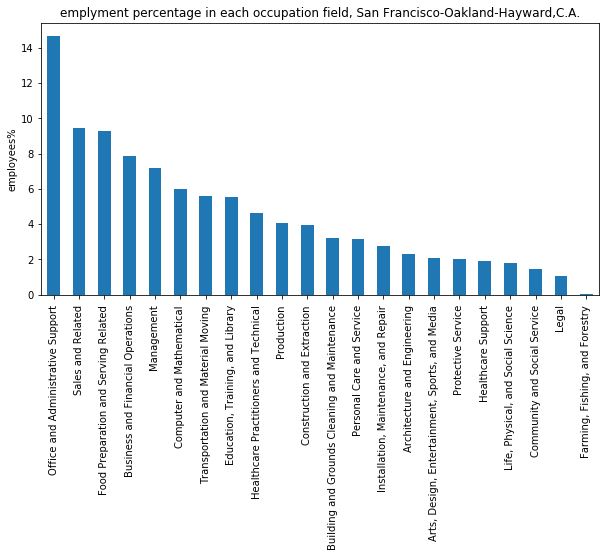

In [16]:
# use a bar chart
sEMP_PERCENTAGE.sort_values(ascending=False).plot(kind='bar',figsize=(10,5))
plt.ylabel('employees%')
plt.xlabel('')
plt.title('emplyment percentage in each occupation field, San Francisco-Oakland-Hayward,C.A.')

It is said that San Francisco has more job opportunities in the field of Computer and Math. According to my analysis, the result showed that the field has 6% employment rate, and the rank is No.6 in San Francisco-Oakland-Hayward,C.A., higher than the average in U.S., where the employment rate in this field is 3.9%, ranking No.10. 
Also, when analyzing Management occupations, the enplyement rate goes up to 7.2%, ranking No.5, compared to the metropolitan area in U.S. with the employment rate 5.9%, ranking No.7.

**#3 What's the wage distrubution in each subgroup in the field of Management Occupations in San Francisco?**

Since the field of Management has the highest income, the detail occupations in this field should be analyzed. What's the critical job that makes this field rank No.1 in San Francisco or even the whole metropolitan areas in U.S.? Does each job has a wide range of variation? Or does one job itself have variation? 

As the salary data set already has the information of each percentile, I turned the data from strings into numbers and wiped the unknown data for better calculation. Then filtered the data outside the managemnet field and outside San Francisco-Oakland-Hayward, CA.

In [17]:
jobs = pd.read_csv('occupations.csv')

#transfer the H_MEAN or A_MEAN or JOBS_1000 number from string to float
jobs['H_PCT10'] = jobs['H_PCT10'].str.replace(',', '')
jobs['H_PCT25'] = jobs['H_PCT25'].str.replace(',', '')
jobs['H_MEDIAN'] = jobs['H_MEDIAN'].str.replace(',', '')
jobs['H_PCT75'] = jobs['H_PCT75'].str.replace(',', '')
jobs['H_PCT90'] = jobs['H_PCT90'].str.replace(',', '')
jobs['H_PCT10'] = pd.to_numeric(jobs.A_PCT10, errors='coerce')
jobs['H_PCT25'] = pd.to_numeric(jobs.A_PCT25, errors='coerce')
jobs['H_MEDIAN'] = pd.to_numeric(jobs.A_MEDIAN, errors='coerce')
jobs['H_PCT75'] = pd.to_numeric(jobs.A_PCT75, errors='coerce')
jobs['H_PCT90'] = pd.to_numeric(jobs.A_PCT90, errors='coerce')

jobs['A_PCT10'] = jobs['A_PCT10'].str.replace(',', '')
jobs['A_PCT25'] = jobs['A_PCT25'].str.replace(',', '')
jobs['A_MEDIAN'] = jobs['A_MEDIAN'].str.replace(',', '')
jobs['A_PCT75'] = jobs['A_PCT75'].str.replace(',', '')
jobs['A_PCT90'] = jobs['A_PCT90'].str.replace(',', '')
jobs['A_PCT10'] = pd.to_numeric(jobs.A_PCT10, errors='coerce')
jobs['A_PCT25'] = pd.to_numeric(jobs.A_PCT25, errors='coerce')
jobs['A_MEDIAN'] = pd.to_numeric(jobs.A_MEDIAN, errors='coerce')
jobs['A_PCT75'] = pd.to_numeric(jobs.A_PCT75, errors='coerce')
jobs['A_PCT90'] = pd.to_numeric(jobs.A_PCT90, errors='coerce')

#drop the word'Occupations' in each row of OCC_TITLE
jobs['OCC_TITLE'] = jobs['OCC_TITLE'].str.replace('Occupations', '')

#delete the rows without value
job=jobs[jobs['H_PCT10'].notnull()]
jobA=jobs[jobs['A_PCT10'].notnull()]

#filter the data without'major'
detail = job[job['OCC_GROUP'].str.contains('detailed')]
subCA = detail[detail['OCC_CODE'].str.contains('11-')]
sub = subCA[subCA['AREA_NAME'].str.contains('San Francisco-Oakland-Hayward, CA')]
sub_new=sub.set_index('OCC_TITLE')
print(sub_new)

detailA = jobA[jobA['OCC_GROUP'].str.contains('detailed')]
subCAA = detailA[detailA['OCC_CODE'].str.contains('11-')]
subA = subCAA[subCAA['AREA_NAME'].str.contains('San Francisco-Oakland-Hayward, CA')]
sub_newA=subA.set_index('OCC_TITLE')
sub_newA.head()

Empty DataFrame
Columns: [PRIM_STATE, AREA, AREA_NAME, OCC_CODE, OCC_GROUP, TOT_EMP, EMP_PRSE, JOBS_1000, LOC QUOTIENT, H_MEAN, A_MEAN, MEAN_PRSE, H_PCT10, H_PCT25, H_MEDIAN, H_PCT75, H_PCT90, A_PCT10, A_PCT25, A_MEDIAN, A_PCT75, A_PCT90, ANNUAL, HOURLY]
Index: []

[0 rows x 24 columns]


,PRIM_STATE,AREA,AREA_NAME,OCC_CODE,OCC_GROUP,TOT_EMP,EMP_PRSE,JOBS_1000,LOC QUOTIENT,H_MEAN,...,H_MEDIAN,H_PCT75,H_PCT90,A_PCT10,A_PCT25,A_MEDIAN,A_PCT75,A_PCT90,ANNUAL,HOURLY
OCC_TITLE,,,,,,,,,,,,,,,,,,,,,
Chief Executives,CA,41860,"San Francisco-Oakland-Hayward, CA",11-1011,detailed,"5,210",3.2,2.300,1.45,111.81,...,NaN,NaN,NaN,105130.0,158450.0,NaN,NaN,NaN,NaN,NaN
General and Operations Managers,CA,41860,"San Francisco-Oakland-Hayward, CA",11-1021,detailed,"40,510",2.0,17.902,1.15,73.71,...,NaN,NaN,NaN,58300.0,83890.0,128060.0,202350.0,NaN,NaN,NaN
Legislators,CA,41860,"San Francisco-Oakland-Hayward, CA",11-1031,detailed,230,8.7,0.103,0.27,*,...,NaN,NaN,NaN,35580.0,44440.0,62420.0,80230.0,106510.0,True,NaN
Advertising and Promotions Managers,CA,41860,"San Francisco-Oakland-Hayward, CA",11-2011,detailed,940,14.0,0.413,2.01,58.42,...,NaN,NaN,NaN,51860.0,79010.0,106470.0,155140.0,198390.0,NaN,NaN
Marketing Managers,CA,41860,"San Francisco-Oakland-Hayward, CA",11-2021,detailed,"8,710",5.1,3.847,2.62,87.84,...,NaN,NaN,NaN,92190.0,127720.0,170390.0,NaN,NaN,NaN,NaN


In [18]:
import seaborn as sns
boxplotH = sub_new[['H_PCT10', 'H_PCT25', 'H_MEDIAN', 'H_PCT75', 'H_PCT90']]
boxplot_new=sns.boxplot(boxplotH.T)
plt.xticks(rotation=90)
plt.title('Hourly income distribution in the field of management in San Francisco-Oakland-Hayward, CA')
plt.xlabel('')
plt.ylabel('Hourly Income ($)')
plt.show()

/Users/michellehung/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


ValueError: min() arg is an empty sequence

/Users/michellehung/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


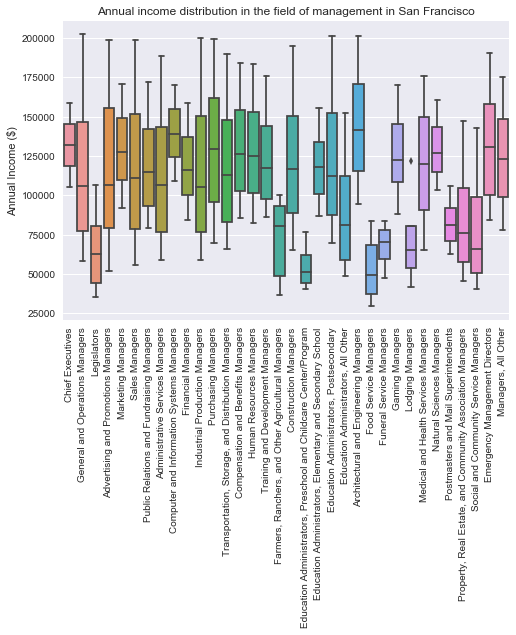

In [19]:
import seaborn as sns
boxplotA = sub_newA[['A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75', 'A_PCT90']]
boxplot_new=sns.boxplot(boxplotA.T)
plt.xticks(rotation=90)
plt.title('Annual income distribution in the field of management in San Francisco-Oakland-Hayward, CA')
plt.ylabel('Annual Income ($)')
plt.xlabel('')
plt.show()

The result of hourly and annually income showed that most of the jobs in this field are highly paid, except some of the outlier such as Education administrators, food service managers, funeral service managers. Because some data is missing in the hourly income, more occupations are shown in annual income graph. According to the annual income data, the field architectural and engineering managers has the highest income among all in average. The second and the third are the fields of computer information and system managers and Chief executive, and they are also jobs without much income variation from person to person. 

## Conclusion

Through the analysis, the salary of the field Computer and Math ranks No.3 among both San Francisco-Oakland-Hayward, CA, and metropolitan areas in U.S. The emplyment rate doesn't distribute evenly in different area. In fact, Office and administrative support has the highest emplyment rate among both San Francisco-Oakland-Hayward, CA, and metropolitan areas in U.S. The employment rate of Computer and Math field ranks No.6 in both San Francisco-Oakland-Hayward, CA,and No.10 among metropolitan areas in U.S. Evaluating both the salary and employment rate both San Francisco-Oakland-Hayward, CA,and metropolitan areas in U.S., management can be the dream job to choose. However, since it covers a wide variety of career, it shouldn't be considered a certain occupation. For exmaple, the computer and information system managers is in the management field, but it is a job related to the field of Computer and Math. We can also see a large salary variation in this field, both from person to person and from job to job in the managemnet field. In conclusion, it is better to be experienced enough to get the manager position in every career as a person has high salary and high employment rate in the field of 'Management'.